# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [ ]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from scipy.ndimage.filters import gaussian_filter

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location `~/scikit_learn_data/...`
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]



data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

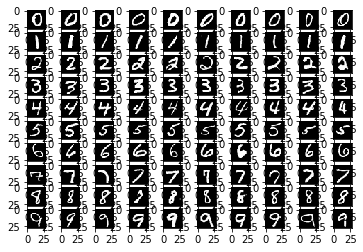

In [3]:
# def P1(num_examples=10):

### STUDENT START ###
  
#creating an empty array for each label type


zeros = list()
ones = list()
twos = list()
threes = list()
fours = list()
fives = list()
sixes = list()
sevens = list()
eights = list()
nines = list()


#appending data to empty arrays with labels that match a certain value 0 - 9

for i, j in enumerate(mini_train_data):
    if int(mini_train_labels[i]) == 0: 
        zeros.append(j)

for i, j in enumerate(mini_train_data):
    if int(mini_train_labels[i]) == 1: 
        ones.append(j)
        
for i, j in enumerate(mini_train_data):
    if int(mini_train_labels[i]) == 2: 
        twos.append(j)
        
for i, j in enumerate(mini_train_data):
    if int(mini_train_labels[i]) == 3: 
        threes.append(j)
        
for i, j in enumerate(mini_train_data):
    if int(mini_train_labels[i]) == 4: 
        fours.append(j)
        
for i, j in enumerate(mini_train_data):
    if int(mini_train_labels[i]) == 5: 
        fives.append(j)
          
for i, j in enumerate(mini_train_data):
    if int(mini_train_labels[i]) == 6: 
        sixes.append(j)
        
for i, j in enumerate(mini_train_data):
    if int(mini_train_labels[i]) == 7: 
        sevens.append(j)        

for i, j in enumerate(mini_train_data):
    if int(mini_train_labels[i]) == 8: 
        eights.append(j)
        
for i, j in enumerate(mini_train_data):
    if int(mini_train_labels[i]) == 9: 
        nines.append(j)

        
#Creating subplots
        
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(10,10)


plt.rc('lines', lw = 2, c = 'b')


for num, i in enumerate(ax1):
    i.imshow(np.reshape(zeros[num],(28,28)), cmap='gray')
for num, i in enumerate(ax2):
    i.imshow(np.reshape(ones[num],(28,28)), cmap='gray')    
for num, i in enumerate(ax3):
    i.imshow(np.reshape(twos[num],(28,28)), cmap='gray')    
for num, i in enumerate(ax4):
    i.imshow(np.reshape(threes[num],(28,28)), cmap='gray')    
for num, i in enumerate(ax5):
    i.imshow(np.reshape(fours[num],(28,28)), cmap='gray')   
for num, i in enumerate(ax6):
    i.imshow(np.reshape(fives[num],(28,28)), cmap='gray')
for num, i in enumerate(ax7):    
    i.imshow(np.reshape(sixes[num],(28,28)), cmap='gray')
for num, i in enumerate(ax8):    
    i.imshow(np.reshape(sevens[num],(28,28)), cmap='gray')
for num, i in enumerate(ax9):    
    i.imshow(np.reshape(eights[num],(28,28)), cmap='gray')
for num, i in enumerate(ax10):    
    i.imshow(np.reshape(nines[num],(28,28)), cmap='gray')


### STUDENT END ###

#P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
#def P2(k_values):

### STUDENT START ###
#creating all models
model_1 = KNeighborsClassifier(n_neighbors=1)
model_3 = KNeighborsClassifier(n_neighbors=3)
model_5 = KNeighborsClassifier(n_neighbors=5)
model_7 = KNeighborsClassifier(n_neighbors=7)
model_9 = KNeighborsClassifier(n_neighbors=9)


#fitting all models
model_1.fit(mini_train_data, mini_train_labels)
model_3.fit(mini_train_data, mini_train_labels)
model_5.fit(mini_train_data, mini_train_labels)
model_7.fit(mini_train_data, mini_train_labels)
model_9.fit(mini_train_data, mini_train_labels)

# K = 1 - predicting against dev set

preds = model_1.predict(dev_data)
correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print 'K1 Results - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)

# K = 3 - predict against dev set

preds = model_3.predict(dev_data)
correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print 'K3 Results - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)

# K = 5 - predict against dev set

preds = model_5.predict(dev_data)
correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print 'K5 Results - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)

# K = 7 - predict against dev set

preds = model_7.predict(dev_data)
correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print 'K7 Results - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)

# K = 9 - predict against dev set

preds = model_9.predict(dev_data)
correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print 'K9 Results - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)

print'\n' '\n'

# print classification report for K-1 Model

print 'K-1 Precision Recall and F1-score for each label \n'

preds = model_1.predict(dev_data)
print classification_report(dev_labels, preds, labels=list(set(dev_labels)),target_names = ['0','1','2','3','4','5','6','7','8','9'])

### STUDENT END ###

#k_values = [1, 3, 5, 7, 9]
#P2(k_values)

K1 Results - total: 1000  correct: 884  accuracy: 0.88
K3 Results - total: 1000  correct: 876  accuracy: 0.88
K5 Results - total: 1000  correct: 882  accuracy: 0.88
K7 Results - total: 1000  correct: 877  accuracy: 0.88
K9 Results - total: 1000  correct: 875  accuracy: 0.88



K-1 Precision Recall and F1-score for each label 

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       118
           1       0.95      0.95      0.95       106
           2       0.93      0.87      0.90        97
           3       0.90      0.79      0.84       106
           4       0.86      0.88      0.87        88
           5       0.91      0.85      0.88        92
           6       0.85      0.94      0.89       102
           7       0.92      0.92      0.92       102
           8       0.80      0.86      0.83        95
           9       0.83      0.77      0.80        94

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.

Based on accuracy alone it appears that each model was fairly comprable with 88% accuracy. 

Looking at the K-1 classification report, it appears that 9 is the most difficult digit (f1-score = 0.8). Depending on relative importance of precision and recall, 8 may also be the most difficult digit as it has worse precision (0.8). However, given we are trying to classify numbers we should reference the f1-score as both precision and recall are equally important.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:

K_1 = KNeighborsClassifier(n_neighbors=1)

# Train size 100

start = time.time()
K_1.fit(train_data[0:100], train_labels[0:100])
end = time.time()
preds = K_1.predict(dev_data)
correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print '100 Training Size Results - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)
print 'Training took %3.2f seconds \n' %(end-start)

# Train size 200

start = time.time()
K_1.fit(train_data[0:200], train_labels[0:200])
end = time.time()
preds = K_1.predict(dev_data)
correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print '200 Training Size Results - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)
print 'Training took %3.2f seconds \n' %(end-start)

# Train size 400
start = time.time()
K_1.fit(train_data[0:400], train_labels[0:400])
end = time.time()
preds = K_1.predict(dev_data)
correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print '400 Training Size Results - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)
print 'Training took %3.2f seconds \n' %(end-start)

# Train size 800
start = time.time()
K_1.fit(train_data[0:800], train_labels[0:800])
end = time.time()
preds = K_1.predict(dev_data)
correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print '800 Training Size Results - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)
print 'Training took %3.2f seconds \n' %(end-start)


# Train size 1600
start = time.time()
K_1.fit(train_data[0:1600], train_labels[0:1600])
end = time.time()
preds = K_1.predict(dev_data)
correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print '1600 Training Size Results - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)
print 'Training took %3.2f seconds \n' %(end-start)


# Train size 3200
start = time.time()
K_1.fit(train_data[0:3200], train_labels[0:3200])
end = time.time()
preds = K_1.predict(dev_data)
correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print '3200 Training Size Results - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)
print 'Training took %3.2f seconds \n' %(end-start)

# Train size 6400
start = time.time()
K_1.fit(train_data[0:6400], train_labels[0:6400])
end = time.time()
preds = K_1.predict(dev_data)
correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print '6400 Training Size Results - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)
print 'Training took %3.2f seconds \n' %(end-start)

#Train size 12800
start = time.time()
K_1.fit(train_data[0:12800], train_labels[0:12800])
end = time.time()
preds = K_1.predict(dev_data)
correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print '12800 Training Size Results - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)
print 'Training took %3.2f seconds \n' %(end-start)

# Train size 25000
start = time.time()
K_1.fit(train_data[0:25000], train_labels[0:25000])
end = time.time()
preds = K_1.predict(dev_data)
correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print '25000 Training Size Results - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)
print 'Training took %3.2f seconds \n' %(end-start)


100 Training Size Results - total: 1000  correct: 702  accuracy: 0.70
Training took 0.00 seconds 

200 Training Size Results - total: 1000  correct: 791  accuracy: 0.79
Training took 0.00 seconds 

400 Training Size Results - total: 1000  correct: 811  accuracy: 0.81
Training took 0.01 seconds 

800 Training Size Results - total: 1000  correct: 866  accuracy: 0.87
Training took 0.01 seconds 

1600 Training Size Results - total: 1000  correct: 905  accuracy: 0.91
Training took 0.03 seconds 

3200 Training Size Results - total: 1000  correct: 927  accuracy: 0.93
Training took 0.10 seconds 

6400 Training Size Results - total: 1000  correct: 939  accuracy: 0.94
Training took 0.26 seconds 

12800 Training Size Results - total: 1000  correct: 952  accuracy: 0.95
Training took 0.92 seconds 

25000 Training Size Results - total: 1000  correct: 962  accuracy: 0.96
Training took 3.71 seconds 



(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

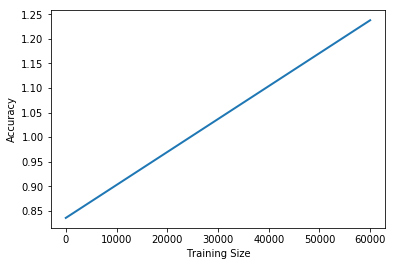

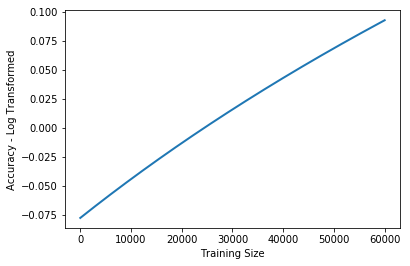

In [6]:
#def P4():

# Fitting Linear Regression and predicting

#The model needs to be K-1 and I need two arrays, one of training size and one of accuracy of K-1 model at training size.

# Creating a list of results from P3 into lists training_size and accuracy

training_size = [[100], [200], [400], [800], [1600], [3200], [6400], [12800], [25000]]
accuracy = [0.70, 0.79, 0.81, 0.87, 0.91, 0.93, 0.94, 0.95, 0.96]
dummy_size = list(range(0,60000,1))
dummy_size_1 = list()

for i in dummy_size:
    dummy_size_1.append([i])
    

regress = LinearRegression().fit(training_size, accuracy)
pred_dummy_size = regress.predict(dummy_size_1)
pred_log = list()
for a in pred_dummy_size:
    pred_log.append(np.log10(a))


a = plt.plot(dummy_size, pred_dummy_size)
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.show()

b = plt.plot(dummy_size, pred_log)
plt.xlabel('Training Size')
plt.ylabel('Accuracy - Log Transformed')
plt.show()


### STUDENT END ###

#P4()

ANSWER: The problem with running a linear regression here is that it returns accuracy levels greater than 100% as seen in the first graph. 

It would be best to run a log base 10 transformation to limit our output variable, accuracy to be less than 1. However, you will also notice the transformed predictions are now negative for low training sizes which is not within our outcome set [0,1]. This would require another transformation to ensure our predictions are strictly between 0 and 1.

(5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Confusion Matrix 

[[101   0   1   0   0   2   1   0   1   0]
 [  0 116   4   2   0   0   2   1   5   1]
 [  1   1  84   0   1   0   1   1   4   0]
 [  0   0   2  84   0   1   0   0   3   0]
 [  0   0   2   0  78   1   1   0   1   3]
 [  0   0   0   6   0  77   2   0   3   2]
 [  1   0   2   0   0   5  94   0   0   0]
 [  1   0   4   2   2   0   0  96   1   7]
 [  2   1   6   3   0   2   1   0  72   0]
 [  0   0   1   0  11   0   0   4   4  82]]

 Examples of misclassified 9's and 4's


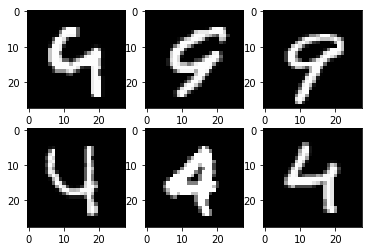

In [7]:
#def P5():

### STUDENT START ###

k_1 = KNeighborsClassifier(n_neighbors=1)
mistake_4 = list()
mistake_9 = list()

print 'Confusion Matrix \n'
k_1.fit(mini_train_data, mini_train_labels)
preds = k_1.predict(dev_data)
print confusion_matrix(preds, dev_labels, labels=['0', '1', '2','3', '4', '5', '6', '7', '8', '9'])

for i, pred in enumerate(preds):
    if int(pred) == 4 and int(dev_labels[i]) == 9:
        mistake_4.append(dev_data[i])

for i, pred in enumerate(preds):
    if int(pred) == 9 and int(dev_labels[i]) == 4:
        mistake_9.append(dev_data[i])
           
        
plt.rc('lines', lw = 2, c = 'b')

fig, (ax1, ax2) = plt.subplots(2,3)
print '\n Examples of misclassified 9\'s and 4\'s'
for num, i in enumerate(ax1):
    i.imshow(np.reshape(mistake_4[num],(28,28)), cmap='gray')
for num, i in enumerate(ax2):
    i.imshow(np.reshape(mistake_9[num],(28,28)), cmap='gray')

    
### STUDENT END ###

#P5()

Answer: The two most confused digits were nine and four. 11 nines were predicted to be fours, while 3 fours were predicted to be nines.

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [8]:
new_mini_train_data = list()

for i in mini_train_data:
     new_mini_train_data.append(np.reshape(i,(28,28)))

# Case 1: Smoothing the Training Data (new_mini_train_data) but not Dev Data 

for j, img in enumerate(new_mini_train_data):
    for k, row in enumerate(img[1:-1]):
        for l, col in enumerate(row[1:-1]):
            img[k][l] = (img[k-1][l-1]+img[k-1][l]+img[k-1][l+1]+row[l-1]+row[l]+row[l+1]+img[k+1][l-1]+img[k+1][l]+img[l+1][l+1])/9


for num, i in enumerate(new_mini_train_data):
    new_mini_train_data[num] = np.reshape(i,784)            

            
            
# Test accuracy after smoothing the Training Data but not Dev Data
        
K_1 = KNeighborsClassifier(n_neighbors=1)

K_1.fit(new_mini_train_data, mini_train_labels)
preds = K_1.predict(dev_data)
correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print 'Smoothed Training Data - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)         
           

# Case 2: Smoothing the Dev Data (new_dev_data) but not the training data (mini_train_data)
new_dev_data = list()

for i in dev_data:
    new_dev_data.append(np.reshape(i,(28,28)))
       
for j, img in enumerate(new_dev_data):
    for k, row in enumerate(img[1:-1]):
        for l, col in enumerate(row[1:-1]):
            img[k][l] = (img[k-1][l-1]+img[k-1][l]+img[k-1][l+1]+row[l-1]+row[l]+row[l+1]+img[k+1][l-1]+img[k+1][l]+img[l+1][l+1])/9

for num, i in enumerate(new_dev_data):
    new_dev_data[num] = np.reshape(i,784)
            
            
K_1.fit(mini_train_data, mini_train_labels)
preds = K_1.predict(new_dev_data)
correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print '\nSmoothed Dev Data - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total) 

# Case 3: Smoothing the Training Data (new_mini_train_data) and the Dev Data (new_dev_data)
            
K_1.fit(new_mini_train_data, mini_train_labels)
preds = K_1.predict(new_dev_data)
correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print '\nSmoothed Train + Dev Data - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)          

# Base Case: No Smoothing

K_1.fit(mini_train_data, mini_train_labels)
preds = K_1.predict(dev_data)
correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print '\nNo Smoothing - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total) 


Smoothed Training Data - total: 1000  correct: 879  accuracy: 0.88

Smoothed Dev Data - total: 1000  correct: 891  accuracy: 0.89

Smoothed Train + Dev Data - total: 1000  correct: 891  accuracy: 0.89

No Smoothing - total: 1000  correct: 891  accuracy: 0.89


The smoothing appears to have had very little impact on the accuracy of the K-1 model. Accuracy is consistely slightly worse in the smoothed training data case. However, all are within a few percentage points making the difference in performance somewhat negligable. 

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [9]:

#Reset mini_train_data and dev data
mini_train_data, mini_train_labels = X[:1000], Y[:1000]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]

# Create Binary Data

Bern_NB = BernoulliNB(alpha = 0, binarize = 0.01)
Bern_NB.fit(mini_train_data, mini_train_labels)
preds = Bern_NB.predict(dev_data)
# Calculate accuracy of Bernoulli Naive Bayes

correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print 'Bernoulli Naive Bayes - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)

for i, img in enumerate(mini_train_data):
    for j, pix in enumerate(img):
        if pix > 0.5: pix = 2
        elif pix > 0.001: pix = 1
        else: pix = 0

Multi_NB = MultinomialNB(alpha = 0)
Multi_NB.fit(mini_train_data, mini_train_labels)
preds = Multi_NB.predict(dev_data)

correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print 'Multinomial Naive Bayes - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Bernoulli Naive Bayes - total: 1000  correct: 683  accuracy: 0.68
Multinomial Naive Bayes - total: 1000  correct: 791  accuracy: 0.79


Multinomial Naive Bayes actually did improve our accuracy in predicting the dev set. This is likely because the bernoulli Naive Bayes gerneralized the data too much causing predictions to be worse. However, the added granuality of breaking pixels into black, grey and white gave our model additional input information that allowed it to predict the true label more consistently. 

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [10]:

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}

nb = GridSearchCV(BernoulliNB(), alphas, scoring = 'accuracy')

nb.fit(mini_train_data, mini_train_labels)

print nb.best_params_


# Testing accuracy with alpha = 1

Bern_NB = BernoulliNB(alpha = 1, binarize = 0.01)
Bern_NB.fit(mini_train_data, mini_train_labels)
preds = Bern_NB.predict(dev_data)

# Calculate accuracy of Bernoulli Naive Bayes

correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print 'Bernoulli Naive Bayes alpha=1 - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)

# Testing accuracy with alpha = 0.5

Bern_NB = BernoulliNB(alpha = 0.5, binarize = 0.01)
Bern_NB.fit(mini_train_data, mini_train_labels)
preds = Bern_NB.predict(dev_data)

# Calculate accuracy of Bernoulli Naive Bayes

correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print 'Bernoulli Naive Bayes alpha=0.5 - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)

# Testing accuracy with alpha = 0

Bern_NB = BernoulliNB(alpha = 0, binarize = 0.01)
Bern_NB.fit(mini_train_data, mini_train_labels)
preds = Bern_NB.predict(dev_data)
# Calculate accuracy of Bernoulli Naive Bayes

correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print 'Bernoulli Naive Bayes alpha=0 - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)



/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'alpha': 0.0}
Bernoulli Naive Bayes alpha=1 - total: 1000  correct: 661  accuracy: 0.66
Bernoulli Naive Bayes alpha=0.5 - total: 1000  correct: 669  accuracy: 0.67
Bernoulli Naive Bayes alpha=0 - total: 1000  correct: 683  accuracy: 0.68


The best value of alpha = 0.0. The accuracy at alpha = 0.0 was 0.68 - I had run my BernoulliNB at this level of alpha for the previous problem and had gotten a similar result for accuracy so this was along the lines of what I was expecting. 

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [12]:
#def P9():

### STUDENT END ###

gaussian = GaussianNB(var_smoothing = 0)
gnb = gaussian.fit(mini_train_data, mini_train_labels)
preds = gaussian.predict(dev_data)

correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print 'Gaussian Naive Bayes - No Smoothing - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)


print gnb.theta_
print gnb.sigma_

# Making a change to GaussianNB to get better accuracy by changing the var_smoothing

gaussian = GaussianNB(var_smoothing = 0.5)
gnb = gaussian.fit(mini_train_data, mini_train_labels)
preds = gaussian.predict(dev_data)

correct, total = 0, 0
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print 'Gaussian Naive Bayes - With Smoothing - total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)

print gnb.theta_
print gnb.sigma_

### STUDENT END ###

#gnb = P9()

Gaussian Naive Bayes - No Smoothing - total: 1000  correct: 106  accuracy: 0.11
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Gaussian Naive Bayes - With Smoothing - total: 1000  correct: 769  accuracy: 0.77
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.05834064 0.05834064 0.05834064 ... 0.05834064 0.05834064 0.05834064]
 [0.05834064 0.05834064 0.05834064 ... 0.05834064 0.05834064 0.05834064]
 [0.05834064 0.05834064 0.05834064 ... 0.05834064 0.05834064 0.05834064]
 ...
 [0.05834064 0.05834064 0.05834064 ... 0.05834064 0.05834064 0.05834064]
 [0.05834064 0.05834064 0.05834064 ... 0.05834064 0.05834064 0.05834064]


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/naive_bayes.py:438: RuntimeWarning: divide by zero encountered in divide
  (self.sigma_[i, :]), 1)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/naive_bayes.py:438: RuntimeWarning: invalid value encountered in divide
  (self.sigma_[i, :]), 1)


The problem was that GaussianNB assumes a mean value for each pixel equal to 0 (see: theta_) and a very low variance for each feature (see: sigma_). However, if we adjust the var_smoothing parameter to be greater than 0 we get a much better accuracy score.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

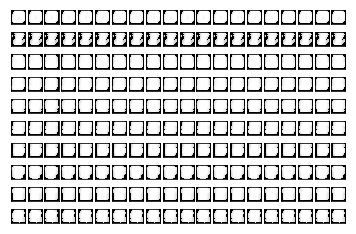

In [13]:

# Using the Bernoulli Model trained in question 8

log_prob = Bern_NB.feature_log_prob_

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(10,20)

for i in log_prob:
    for j in i:
        j = np.exp(j)
           

for num, i in enumerate(ax1):
    i.set_xticks([])
    i.set_yticks([])
    i.imshow(np.reshape(log_prob[0],(28,28)), cmap='gray')
for num, i in enumerate(ax2):
    i.set_xticks([])
    i.set_yticks([])
    i.imshow(np.reshape(log_prob[1],(28,28)), cmap='gray')
for num, i in enumerate(ax3):
    i.set_xticks([])
    i.set_yticks([])
    i.imshow(np.reshape(log_prob[2],(28,28)), cmap='gray')
for num, i in enumerate(ax4):
    i.set_xticks([])
    i.set_yticks([])
    i.imshow(np.reshape(log_prob[3],(28,28)), cmap='gray')
for num, i in enumerate(ax5):
    i.set_xticks([])
    i.set_yticks([])
    i.imshow(np.reshape(log_prob[4],(28,28)), cmap='gray')
for num, i in enumerate(ax6):
    i.set_xticks([])
    i.set_yticks([])
    i.imshow(np.reshape(log_prob[5],(28,28)), cmap='gray')
for num, i in enumerate(ax7):
    i.set_xticks([])
    i.set_yticks([])
    i.imshow(np.reshape(log_prob[6],(28,28)), cmap='gray')
for num, i in enumerate(ax8):
    i.set_xticks([])
    i.set_yticks([])
    i.imshow(np.reshape(log_prob[7],(28,28)), cmap='gray')
for num, i in enumerate(ax9):
    i.set_xticks([])
    i.set_yticks([])
    i.imshow(np.reshape(log_prob[8],(28,28)), cmap='gray')
for num, i in enumerate(ax10):
    i.set_xticks([])
    i.set_yticks([])
    i.imshow(np.reshape(log_prob[9],(28,28)), cmap='gray')



ANSWER: You will see the digits generated by the Bernoulli Naive Bayes are not a very good representation of the data. This is in large part due to that fact that each pixel had to be either 1 or 0. These digits do a decent job of roughly identifying the outline of each shape. For example, 1 is the only digit with significant black area vertically on either side and 7 is black on the bottom right corner. This might do a decent job of classifying input data; however, this output would not be understood by a human without proper context.

This is similar to what I would've expected. Give that the Bernoulli NB had to output 1 or 0, I wasn't expecting very refined generated digits.